In [1]:
import torch
import models_jw_old
from utils import *
from tqdm import tqdm
import numpy as np
from configs import paramsuper, getters

device = "cuda"

args = paramsuper.ICIFARHashResNet18()

torch.manual_seed(args.seed)
np.random.seed(0)

use_cuda = not args.no_cuda and torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
training_period = 20000

kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
train_loader = getters.get_dataset(args.dataset, training_period, args.batch_size, True, kwargs)

torch.manual_seed(1)
np.random.seed(0)

import models_jw
net2 = models_jw.HashResNet18(10).to(device)

net2.load_state_dict(torch.load("trained_models/5_decrease.pth"))

Files already downloaded and verified
Files already downloaded and verified


KeyboardInterrupt: 

In [ ]:
for idxs, margin in enumerate([1]):
    torch.manual_seed(args.seed)
    np.random.seed(0)
    net = models_jw.HashResNet18(10).to(device)
    train_loader = getters.get_dataset(args.dataset, 10, 10, True, kwargs)
    test_loader = getters.get_dataset(args.dataset, 1, args.test_batch_size, False, kwargs)
    
    optimizer = torch.optim.RMSprop(net.parameters(), lr=0.01)
    TASKS_NUM = 5
    for time in tqdm(range(TASKS_NUM*10)):
        X, y = train_loader.get_data()
        X, y = X.to(device), y.to(device)        
        z = torch.zeros(10, device=device)
        z[time // args.period] = 1
        #z = prepare_fuzzy_z(time // args.period)
        y_hat, _, _ = net(X, z)
        optimizer.zero_grad()
        loss = hinge_loss(y_hat, y, margin)
        loss.backward()
        optimizer.step()
    torch.save(net.state_dict(), f"trained_models/test.pth") #fuzzy-500


    tasks_num = 10
    accs =  {i: 0 for i in range(tasks_num)}
    for time in tqdm(range(tasks_num)):
        X, y = test_loader.get_data()
        X, y = X.to(device), y.to(device)        
        z = torch.zeros(10)
        z[time] = 1
        
        y_hat, _, _ = net(X, z)
        accs[time] = accs[time] + (y_hat.min(1).indices==y).sum().item()
    print(accs)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


  0%|          | 0/50 [01:32<?, ?it/s]


KeyboardInterrupt: 

In [4]:
net = models_jw.HashResNet18(10).to(device)


In [10]:
device

device(type='cuda')

In [9]:
net.state_dict()['conv1.weight']

tensor([[[[ 0.0992, -0.0849, -0.0373],
          [ 0.0903, -0.1812,  0.1154],
          [-0.0396,  0.0979,  0.0268]],

         [[-0.0236,  0.0534,  0.0095],
          [ 0.0703, -0.0750, -0.0140],
          [-0.0173,  0.0279, -0.0008]],

         [[ 0.1682,  0.0599, -0.0717],
          [-0.1162, -0.0323, -0.0830],
          [-0.0617,  0.0092,  0.1147]]],


        [[[ 0.1046, -0.1881,  0.1193],
          [ 0.0538,  0.1825,  0.1270],
          [-0.1753, -0.1830, -0.0928]],

         [[ 0.1690, -0.0321,  0.0824],
          [-0.0894,  0.1888, -0.0814],
          [ 0.1443,  0.0023, -0.1014]],

         [[ 0.0989, -0.1022,  0.0566],
          [-0.0556, -0.0211, -0.1850],
          [-0.0918,  0.1044, -0.0468]]],


        [[[ 0.1917,  0.1543, -0.0090],
          [-0.1285,  0.1172,  0.0597],
          [-0.1244,  0.1250,  0.1168]],

         [[ 0.1707, -0.1079, -0.0317],
          [-0.0037,  0.0281, -0.1461],
          [-0.1366,  0.1047, -0.0451]],

         [[ 0.0940,  0.0110,  0.0632],
     

In [5]:
import torch

# Create a 2D tensor of shape (n, m)
x = torch.randn(5, 4)  # Example tensor with 5 rows and 4 columns

# Randomly select one element from each row
row_indices = torch.arange(x.size(0))  # Get row indices (0, 1, 2, ...)
col_indices = torch.randint(0, x.size(1), (x.size(0),))  # Random column indices for each row

# Select the elements
sampled_elements = x[torch.arange(x.size(0)), torch.randint(0, x.size(1), (x.size(0),))]
print(x)

print("Sampled elements:", sampled_elements)


tensor([[ 1.3847, -0.0655,  0.8540, -0.1729],
        [ 0.9520,  1.4282,  0.0943,  0.1021],
        [ 0.3434, -0.7347,  0.7502,  0.8442],
        [-1.2614, -1.1333,  0.0768, -0.7521],
        [ 1.0032, -0.6598, -1.9737,  1.2169]])
Sampled elements: tensor([[-0.0655, -0.1729, -0.1729, -0.0655, -0.0655],
        [ 1.4282,  0.1021,  0.1021,  1.4282,  1.4282],
        [-0.7347,  0.8442,  0.8442, -0.7347, -0.7347],
        [-1.1333, -0.7521, -0.7521, -1.1333, -1.1333],
        [-0.6598,  1.2169,  1.2169, -0.6598, -0.6598]])


In [4]:
col_indices



tensor([0, 3, 0, 0, 1])

In [2]:
# EVALUATE WITHOUT task_num

num_test = 10
torch.manual_seed(args.seed)
np.random.seed(0)
test_loader = getters.get_dataset(args.dataset, 1, 5, False, kwargs)
accs_test =  {i: 0 for i in range(num_test)}

zzz = {}
for time in tqdm(range(num_test)):
    X, y = test_loader.get_data()
    X, y = X.to(device), y.to(device)        
    y_hat, z, losses = net2(X, None, z_alpha=100)
    zzz[time] = z 
    #accs[time] = accs[time] + (y_hat.min(1).indices==y).sum().item()
    accs_test[time] = accs_test[time] + (torch.tensor(y_hat) == y.to("cpu")).sum().item()
    

Files already downloaded and verified
Files already downloaded and verified


  0%|          | 0/10 [00:00<?, ?it/s]


NameError: name 'net2' is not defined

In [32]:
test_loader = getters.get_dataset(args.dataset, 1, args.test_batch_size, False, kwargs)
tasks_num = 10
accs =  {i: 0 for i in range(tasks_num)}
for time in tqdm(range(tasks_num)):
    X, y = test_loader.get_data()
    X, y = X.to(device), y.to(device)        
    z = torch.zeros(10)
    z[time] = 1
    y_hat, _, _ = net2(X, z)
    accs[time] = accs[time] + (y_hat.min(1).indices==y).sum().item()
accs

Files already downloaded and verified
Files already downloaded and verified


100%|██████████| 10/10 [00:01<00:00,  6.67it/s]


{0: 161, 1: 474, 2: 657, 3: 597, 4: 668, 5: 114, 6: 102, 7: 104, 8: 80, 9: 103}

In [25]:
[500,750,1000,1500,2000]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [6]:
def entropy(probs):
    eps = 1e-9
    probs = torch.clamp(probs, min=eps)
    return -torch.sum(probs * torch.log(probs), dim=-1)

def plot_hists(listt, task_val_num = 5):
    import matplotlib.pyplot as plt
    import torch.nn as nn
    fig, axs = plt.subplots(5,len(listt), sharey=True, figsize=(20,10))
    for idx, l in  enumerate(listt):
        torch.manual_seed(1)
        np.random.seed(0)
        net2 = models_jw.HashResNet18(10).to(device)
        net2.load_state_dict(torch.load(f"trained_models/test.pth"))

        test_loader = getters.get_dataset(args.dataset, 1, 1000, False, kwargs)
        tasks_num = 5
        s = nn.Softmax(dim=1)
        accs =  {i: 0 for i in range(tasks_num)}
        pp, ee, ys  =[], [], []
        for task_num in tqdm(range(tasks_num)):
            X, y = test_loader.get_data()
            X, y = X.to(device), y.to(device)
            p, e = [], []
            for ti in range(task_val_num):       
                z = torch.zeros(10, device=device)
                z[ti] = 1
                y_hat, _, _ = net2(X, z)
                p.append(y_hat.detach().cpu())
                e.append(entropy(s(-y_hat.detach().cpu())))
            pp.append(p)
            ee.append(e)
            ys.append(y.detach().cpu())
            
        for k in range(task_val_num):
            mins, mins_idxs=[],[]
            for i in range(task_val_num):
                mins.append(pp[k][i].min(1).values)
                mins_idxs.append(pp[k][i].min(1).indices)
            predicted_task_num = torch.stack(mins).min(0).indices
            
            y_pred, task_pred = 0, 0
            for ii in range(1000):
                if predicted_task_num[ii] == k:
                    task_pred+=1
                if (torch.stack(mins_idxs)[predicted_task_num[ii], ii] == ys[k][ii]) and  (predicted_task_num[ii] == k):
                    y_pred += 1  
            axs[k,idx].hist(predicted_task_num)
            axs[k,idx].set_ylabel(f"{np.round(y_pred/task_pred*100,0)}")
            axs[0,idx].set_title(l)



Files already downloaded and verified
Files already downloaded and verified


100%|██████████| 5/5 [00:02<00:00,  2.11it/s]


Files already downloaded and verified
Files already downloaded and verified


100%|██████████| 5/5 [00:02<00:00,  2.15it/s]


Files already downloaded and verified
Files already downloaded and verified


100%|██████████| 5/5 [00:02<00:00,  2.15it/s]


Files already downloaded and verified
Files already downloaded and verified


100%|██████████| 5/5 [00:02<00:00,  2.15it/s]


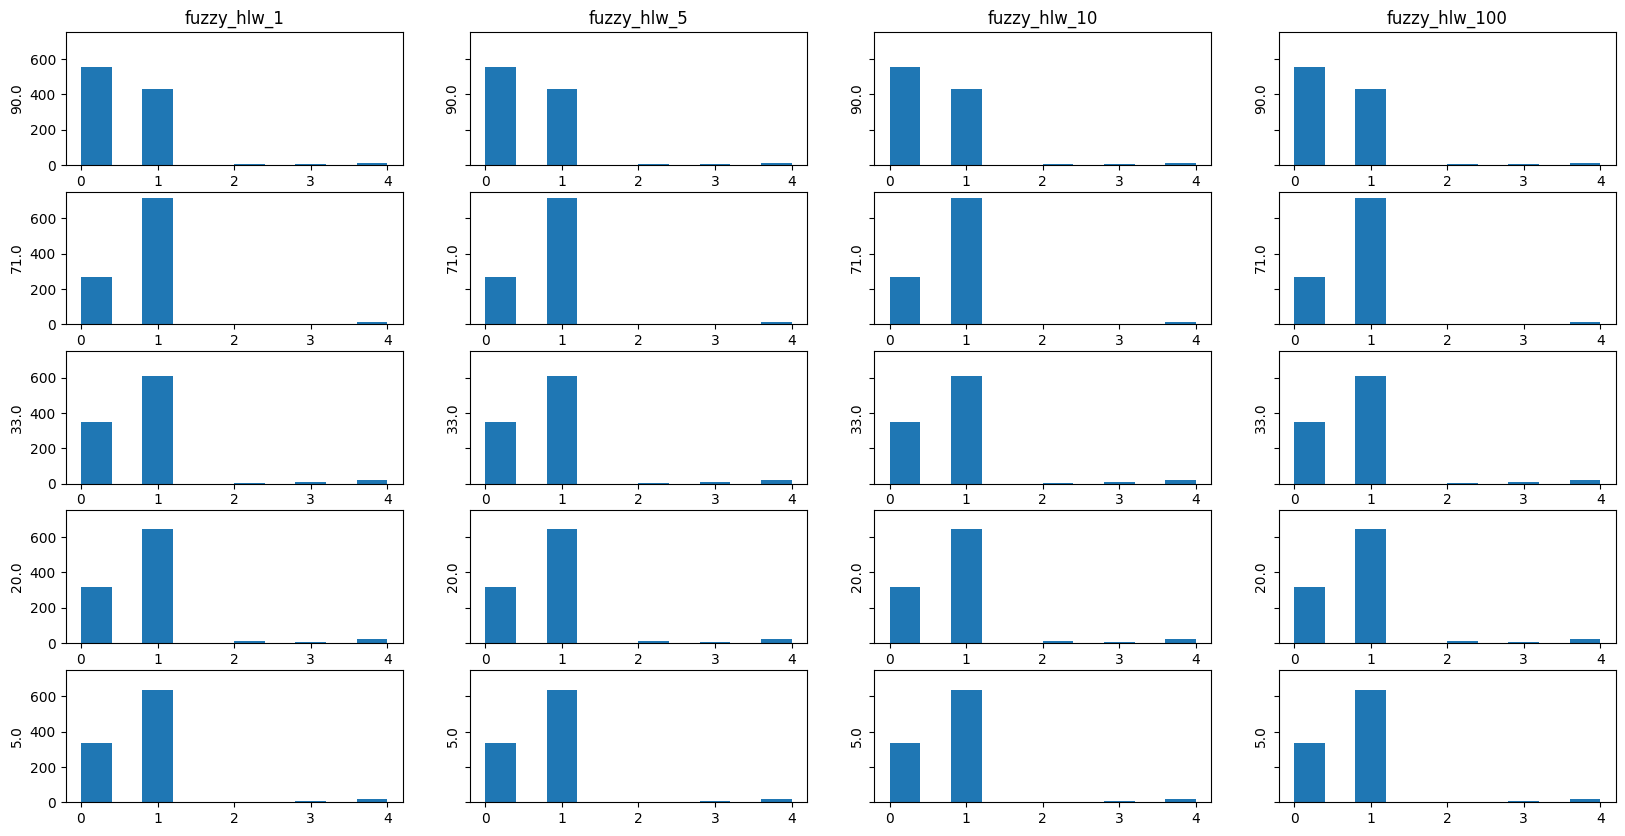

In [7]:
plot_hists([f"fuzzy_hlw_{margin}" for margin in [1,5,10,100]])

Files already downloaded and verified
Files already downloaded and verified


100%|██████████| 5/5 [00:02<00:00,  1.98it/s]


Files already downloaded and verified
Files already downloaded and verified


100%|██████████| 5/5 [00:02<00:00,  2.13it/s]


Files already downloaded and verified
Files already downloaded and verified


100%|██████████| 5/5 [00:02<00:00,  2.13it/s]


Files already downloaded and verified
Files already downloaded and verified


100%|██████████| 5/5 [00:02<00:00,  2.11it/s]


Files already downloaded and verified
Files already downloaded and verified


100%|██████████| 5/5 [00:02<00:00,  2.10it/s]


Files already downloaded and verified
Files already downloaded and verified


100%|██████████| 5/5 [00:02<00:00,  2.10it/s]


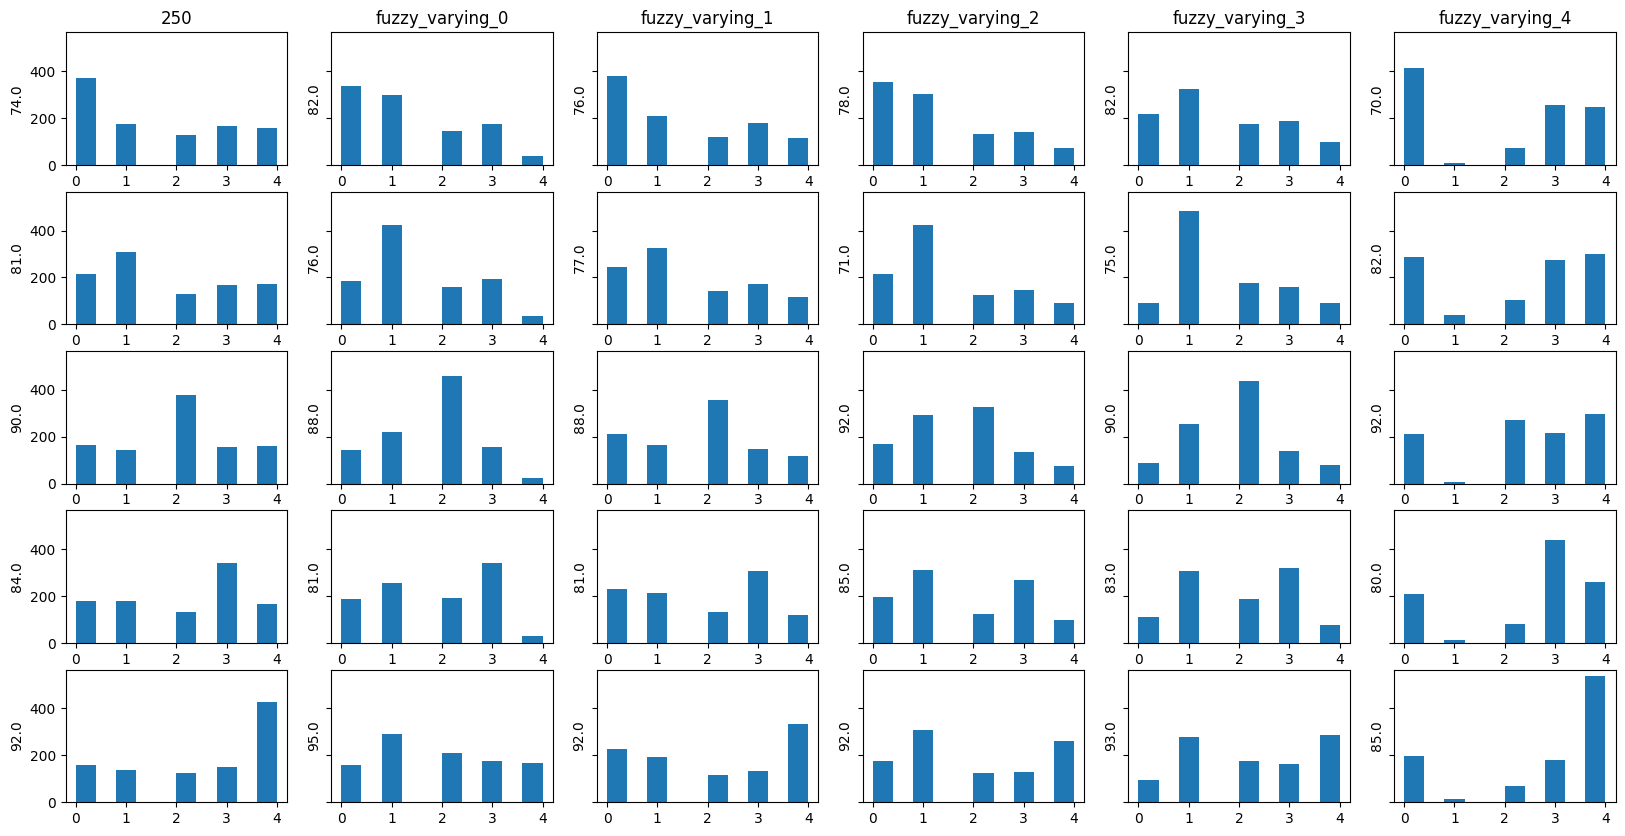

In [3]:
plot_hists(["250", "fuzzy_varying_0","fuzzy_varying_1" ,"fuzzy_varying_2","fuzzy_varying_3", "fuzzy_varying_4"]) #[500,750,1000,1500,2000]

RuntimeError: Error(s) in loading state_dict for HashResNet:
	Missing key(s) in state_dict: "layer1.0.conv1.o", "layer1.0.conv2.o", "layer1.1.conv1.o", "layer1.1.conv2.o", "layer2.0.conv1.o", "layer2.0.conv2.o", "layer2.0.shortcut.0.o", "layer2.1.conv1.o", "layer2.1.conv2.o", "layer3.0.conv1.o", "layer3.0.conv2.o", "layer3.0.shortcut.0.o", "layer3.1.conv1.o", "layer3.1.conv2.o", "layer4.0.conv1.o", "layer4.0.conv2.o", "layer4.0.shortcut.0.o", "layer4.1.conv1.o", "layer4.1.conv2.o", "linear.o". 

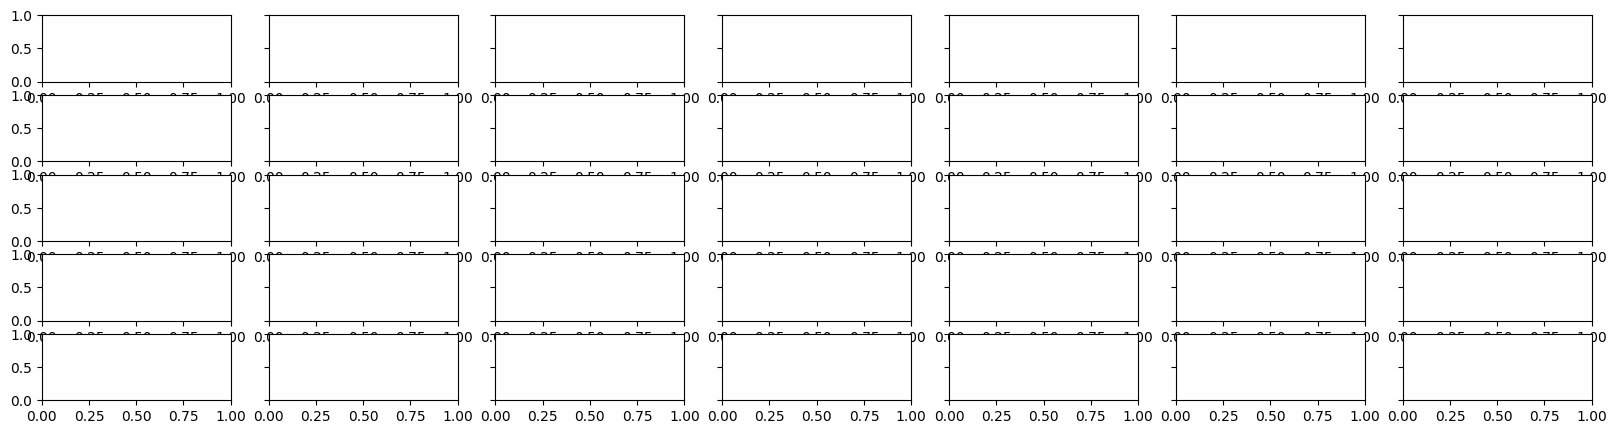

In [7]:
plot_hists(["decreaseNonlinear", 250, 500, 750,1000,1500,2000]) #[500,750,1000,1500,2000]


Files already downloaded and verified
Files already downloaded and verified


100%|██████████| 10/10 [00:03<00:00,  2.72it/s]


Files already downloaded and verified
Files already downloaded and verified


100%|██████████| 10/10 [00:03<00:00,  2.71it/s]


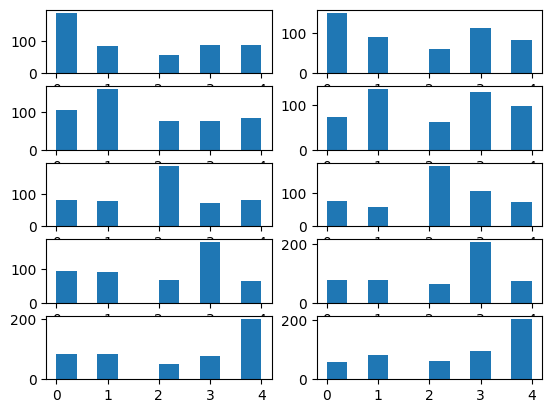

In [ ]:
torch.manual_seed(1)
np.random.seed(0)

net2 = models_jw.HashResNet18(10).to(device)
net2.load_state_dict(torch.load("trained_models/5_250.pth"))

test_loader = getters.get_dataset(args.dataset, 1, 500, False, kwargs)
tasks_num = 10
accs =  {i: 0 for i in range(tasks_num)}
pp=[]
for time in tqdm(range(tasks_num)):
    X, y = test_loader.get_data()
    X, y = X.to(device), y.to(device)
    p=[]
    for ti in range(5):       
        z = torch.zeros(10)
        z[ti] = 1
        y_hat, _, _ = net2(X, z)
        p.append(y_hat.detach().cpu())
    pp.append(p)

import matplotlib.pyplot as plt
fig, axs = plt.subplots(5,2)
for k in range(5):
    mins=[]
    for i in range(5):
        mins.append(pp[k][i].min(1).values)
    axs[k,0].hist(torch.stack(mins).min(0).indices)


torch.manual_seed(1)
np.random.seed(0)

net2 = models_jw.HashResNet18(10).to(device)
net2.load_state_dict(torch.load("trained_models/5_150.pth"))

test_loader = getters.get_dataset(args.dataset, 1, 500, False, kwargs)
tasks_num = 10
accs =  {i: 0 for i in range(tasks_num)}
pp=[]
for time in tqdm(range(tasks_num)):
    X, y = test_loader.get_data()
    X, y = X.to(device), y.to(device)
    p=[]
    for ti in range(5):       
        z = torch.zeros(10)
        z[ti] = 1
        y_hat, _, _ = net2(X, z)
        p.append(y_hat.detach().cpu())
    pp.append(p)

for k in range(5):
    mins=[]
    for i in range(5):
        mins.append(pp[k][i].min(1).values)
    axs[k,1].hist(torch.stack(mins).min(0).indices)

In [22]:
torch.manual_seed(1)
np.random.seed(0)
test_loader = getters.get_dataset(args.dataset, 1, 5, False, kwargs)
data = test_loader.get_data()


Files already downloaded and verified
Files already downloaded and verified


In [21]:
[t.argmax() for t in zzz[2]]


KeyError: 2

In [17]:
zzz[0][0]

tensor([0.0652, 0.1635, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000], device='cuda:0', grad_fn=<CatBackward0>)

In [3]:
accs_test

{0: 0, 1: 0}

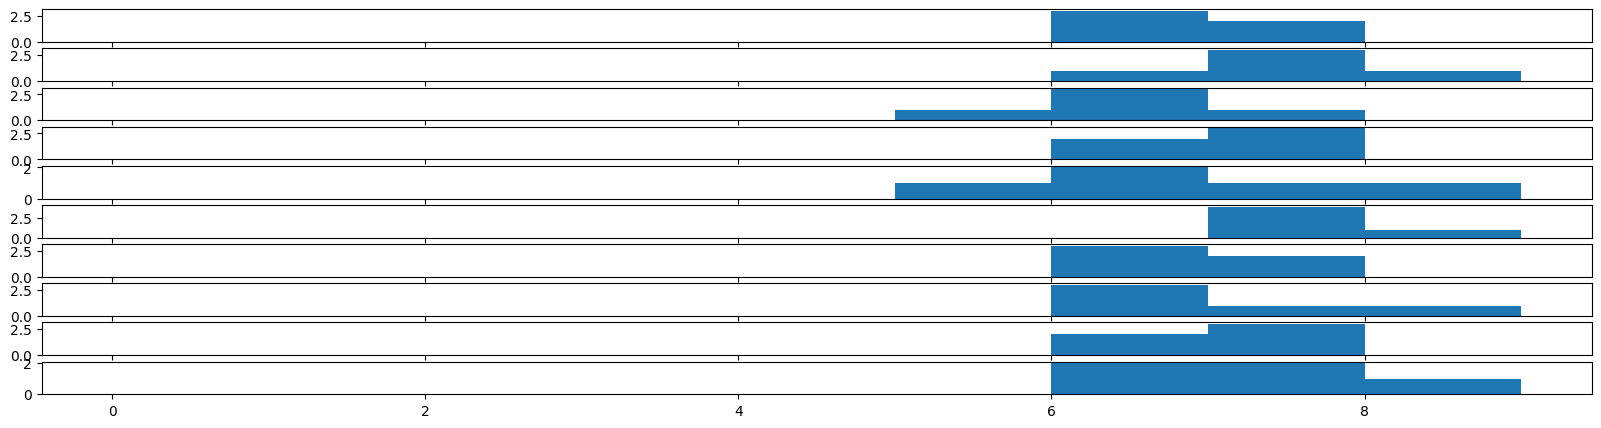

In [6]:

import matplotlib.pyplot as plt
fig, axs = plt.subplots(10, figsize=(20,5))
for i in range(10):
    axs[i].hist(torch.stack(zzz[i]).min(1).indices.cpu().numpy(), bins=range(10))

In [39]:
torch.FloatTensor([1]).cuda() *10000


tensor([10000.], device='cuda:0')